# Task 1 - Exploratory Data Analysis

In [ ]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data into a DataFrame
# https://www.kaggle.com/datasets/vivovinco/19912021-nba-stats (the mvps.csv file)
url = 'https://drive.google.com/file/d/1Z9ZRtcHAeH9wtoUzkvxkEbOJxcFq-BAE/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,12,Ben Simmons,24,PHI,0,3,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,13T,James Harden,31,TOT,0,1,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13T,LeBron James,36,LAL,0,1,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [ ]:
# Check possible errors in the dataset
print(df.isnull().sum()) # check to see if there are any null values
print(df.dtypes)

# Clean the dataset:
# Edit player's names with accents
rows_with_question_mark = df[df['Player'].str.contains('\?', na=False)]
print(rows_with_question_mark) # shows the players who have an accent in their name
updated_players_with_accent = {'Peja Stojakovi?':'Peja Stojaković', 'Goran Dragi?':'Goran Dragić',
                               'Nikola Joki?':'Nikola Jokić', 'Luka Don?i?':'Luka Dončić'}
df['Player'] = df['Player'].replace(updated_players_with_accent)

# Label encoding the ranks
print([df['Rank'].unique()]) # shows the unique ranks (the ones with T signify a tie [ex: 9T = tie for 9th])
labels = {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9T':9, '11':11, '12':12, '13':13,
       '14':14, '15':15, '16':16, '17':17, '18':18, '19T':19, '9':9, '10':10, '12T':12, '16T':16, '8T':8,
       '10T':10, '7T':7, '11T':11, '13T':13, '17T':17, '18T':18, '15T':15, '14T':14}
df['Rank'] = df['Rank'].map(labels)
print(df['Rank'].dtypes) # check that the 'Rank' columns is now numerical
print(df['Rank'])

Rank       0
Player     0
Age        0
Tm         0
First      0
Pts Won    0
Pts Max    0
Share      0
G          0
MP         0
PTS        0
TRB        0
AST        0
STL        0
BLK        0
FG%        0
3P%        0
FT%        0
WS         0
WS/48      0
Year       0
dtype: int64
Rank        object
Player      object
Age          int64
Tm          object
First        int64
Pts Won      int64
Pts Max      int64
Share      float64
G            int64
MP         float64
PTS        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
FG%        float64
3P%        float64
FT%        float64
WS         float64
WS/48      float64
Year         int64
dtype: object
    Rank           Player  Age   Tm  First  Pts Won  Pts Max  Share   G    MP  \
210  16T  Peja Stojakovi?   24  SAC      0        1     1260  0.001  71  37.3   
227    4  Peja Stojakovi?   26  SAC      1      281     1230  0.228  81  40.3   
387   16     Goran Dragi?   27  PHO      0        3     12

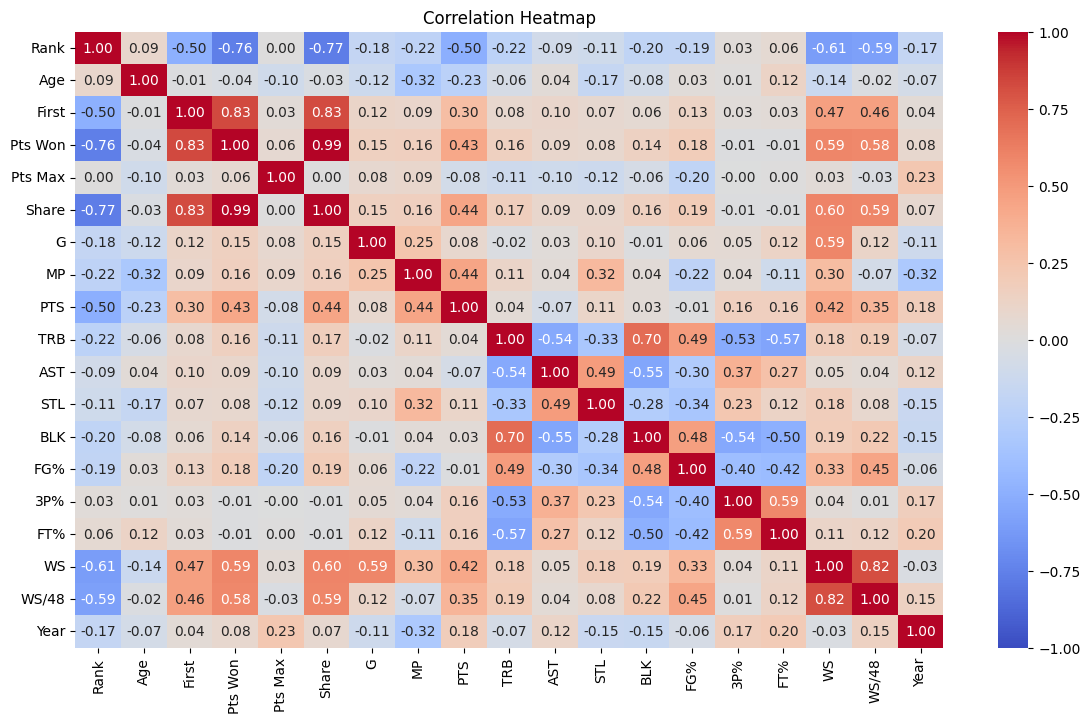

In [ ]:
# Create a Heatmap for the numerical data
num_df = df.drop(columns=['Player', 'Tm'])

# Compute the correlation matrix
correlation_matrix = num_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

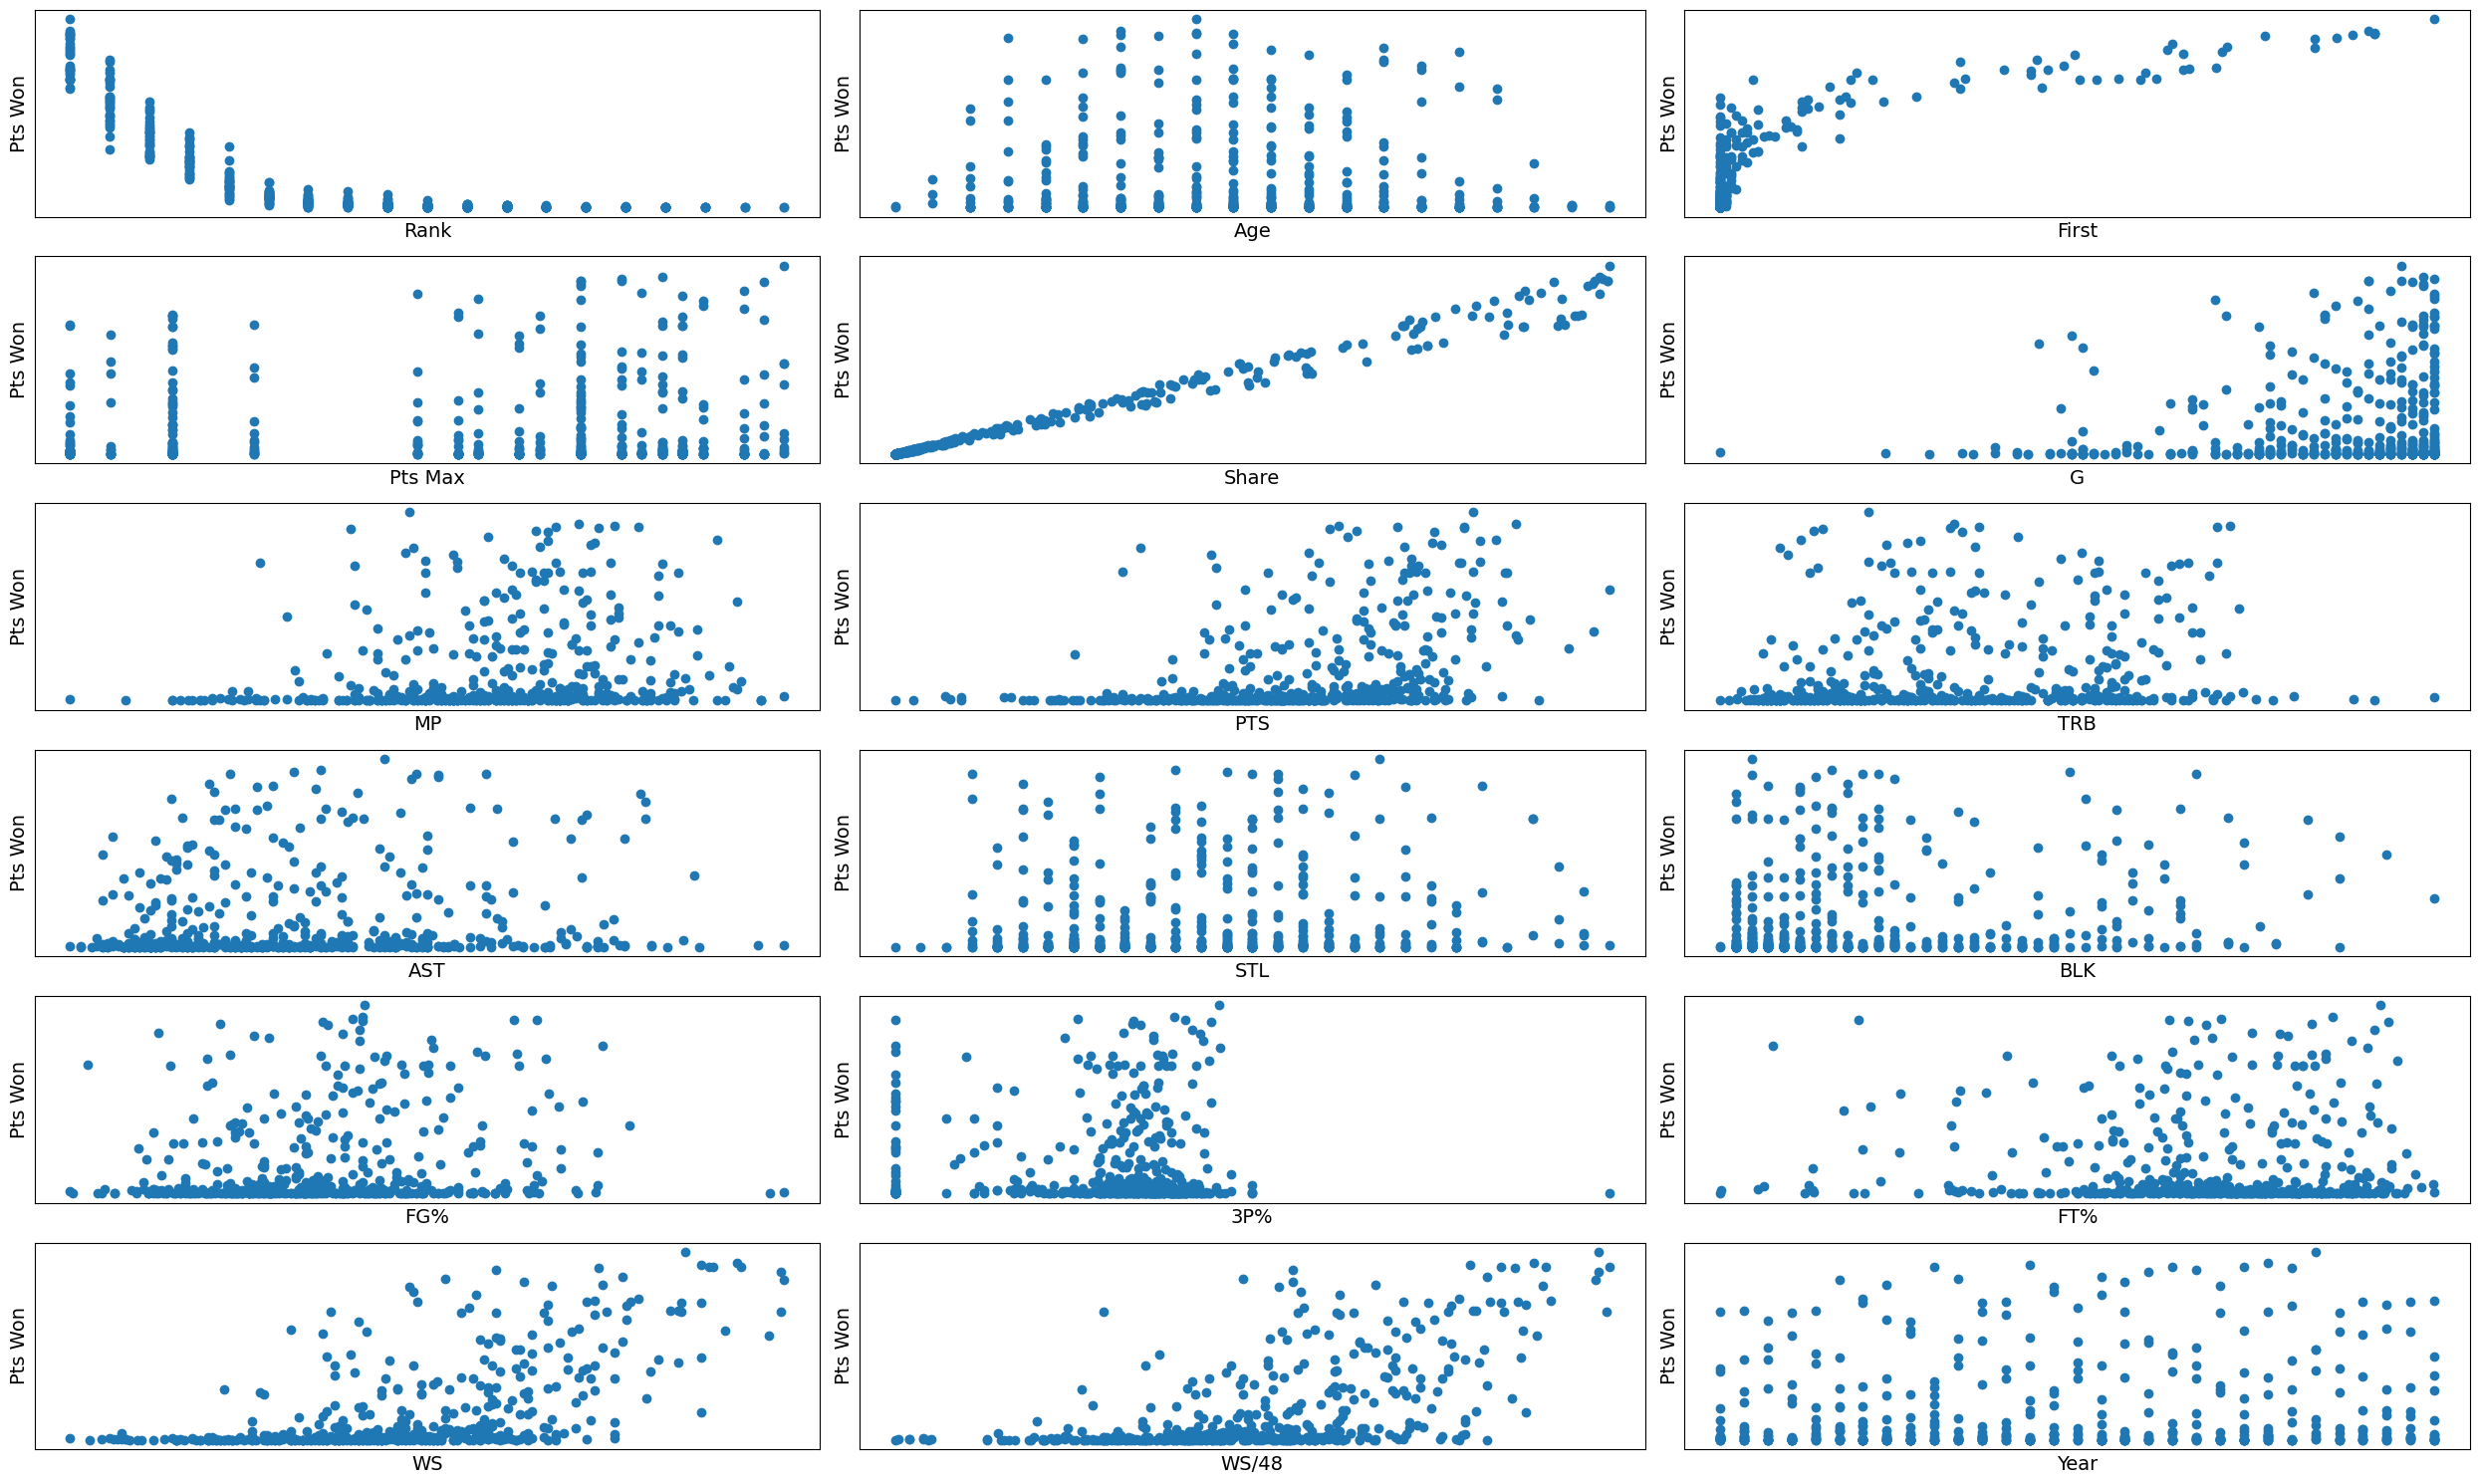

In [ ]:
# Create a Scatter Plot for the numerical data
num_cols = ['Rank','Age', 'First', 'Pts Max', 'Share', 'G', 'MP', 'PTS',
            'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'Year']

# Make the figure for the axes
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(25,15))

# Make the axes
count = 0
for row in ax:
    for col in row:
        if (count < len(num_cols)):
          col.set_xlabel(num_cols[count], fontsize=14)
          col.set_ylabel('Pts Won', fontsize=14)
          col.set_xticks([])
          col.set_yticks([])
          col.plot(df[num_cols[count]], df['Pts Won'],"o")
        count+=1

# Adjust the formatting
plt.tight_layout()

# Show the Scatter Plot
plt.show()

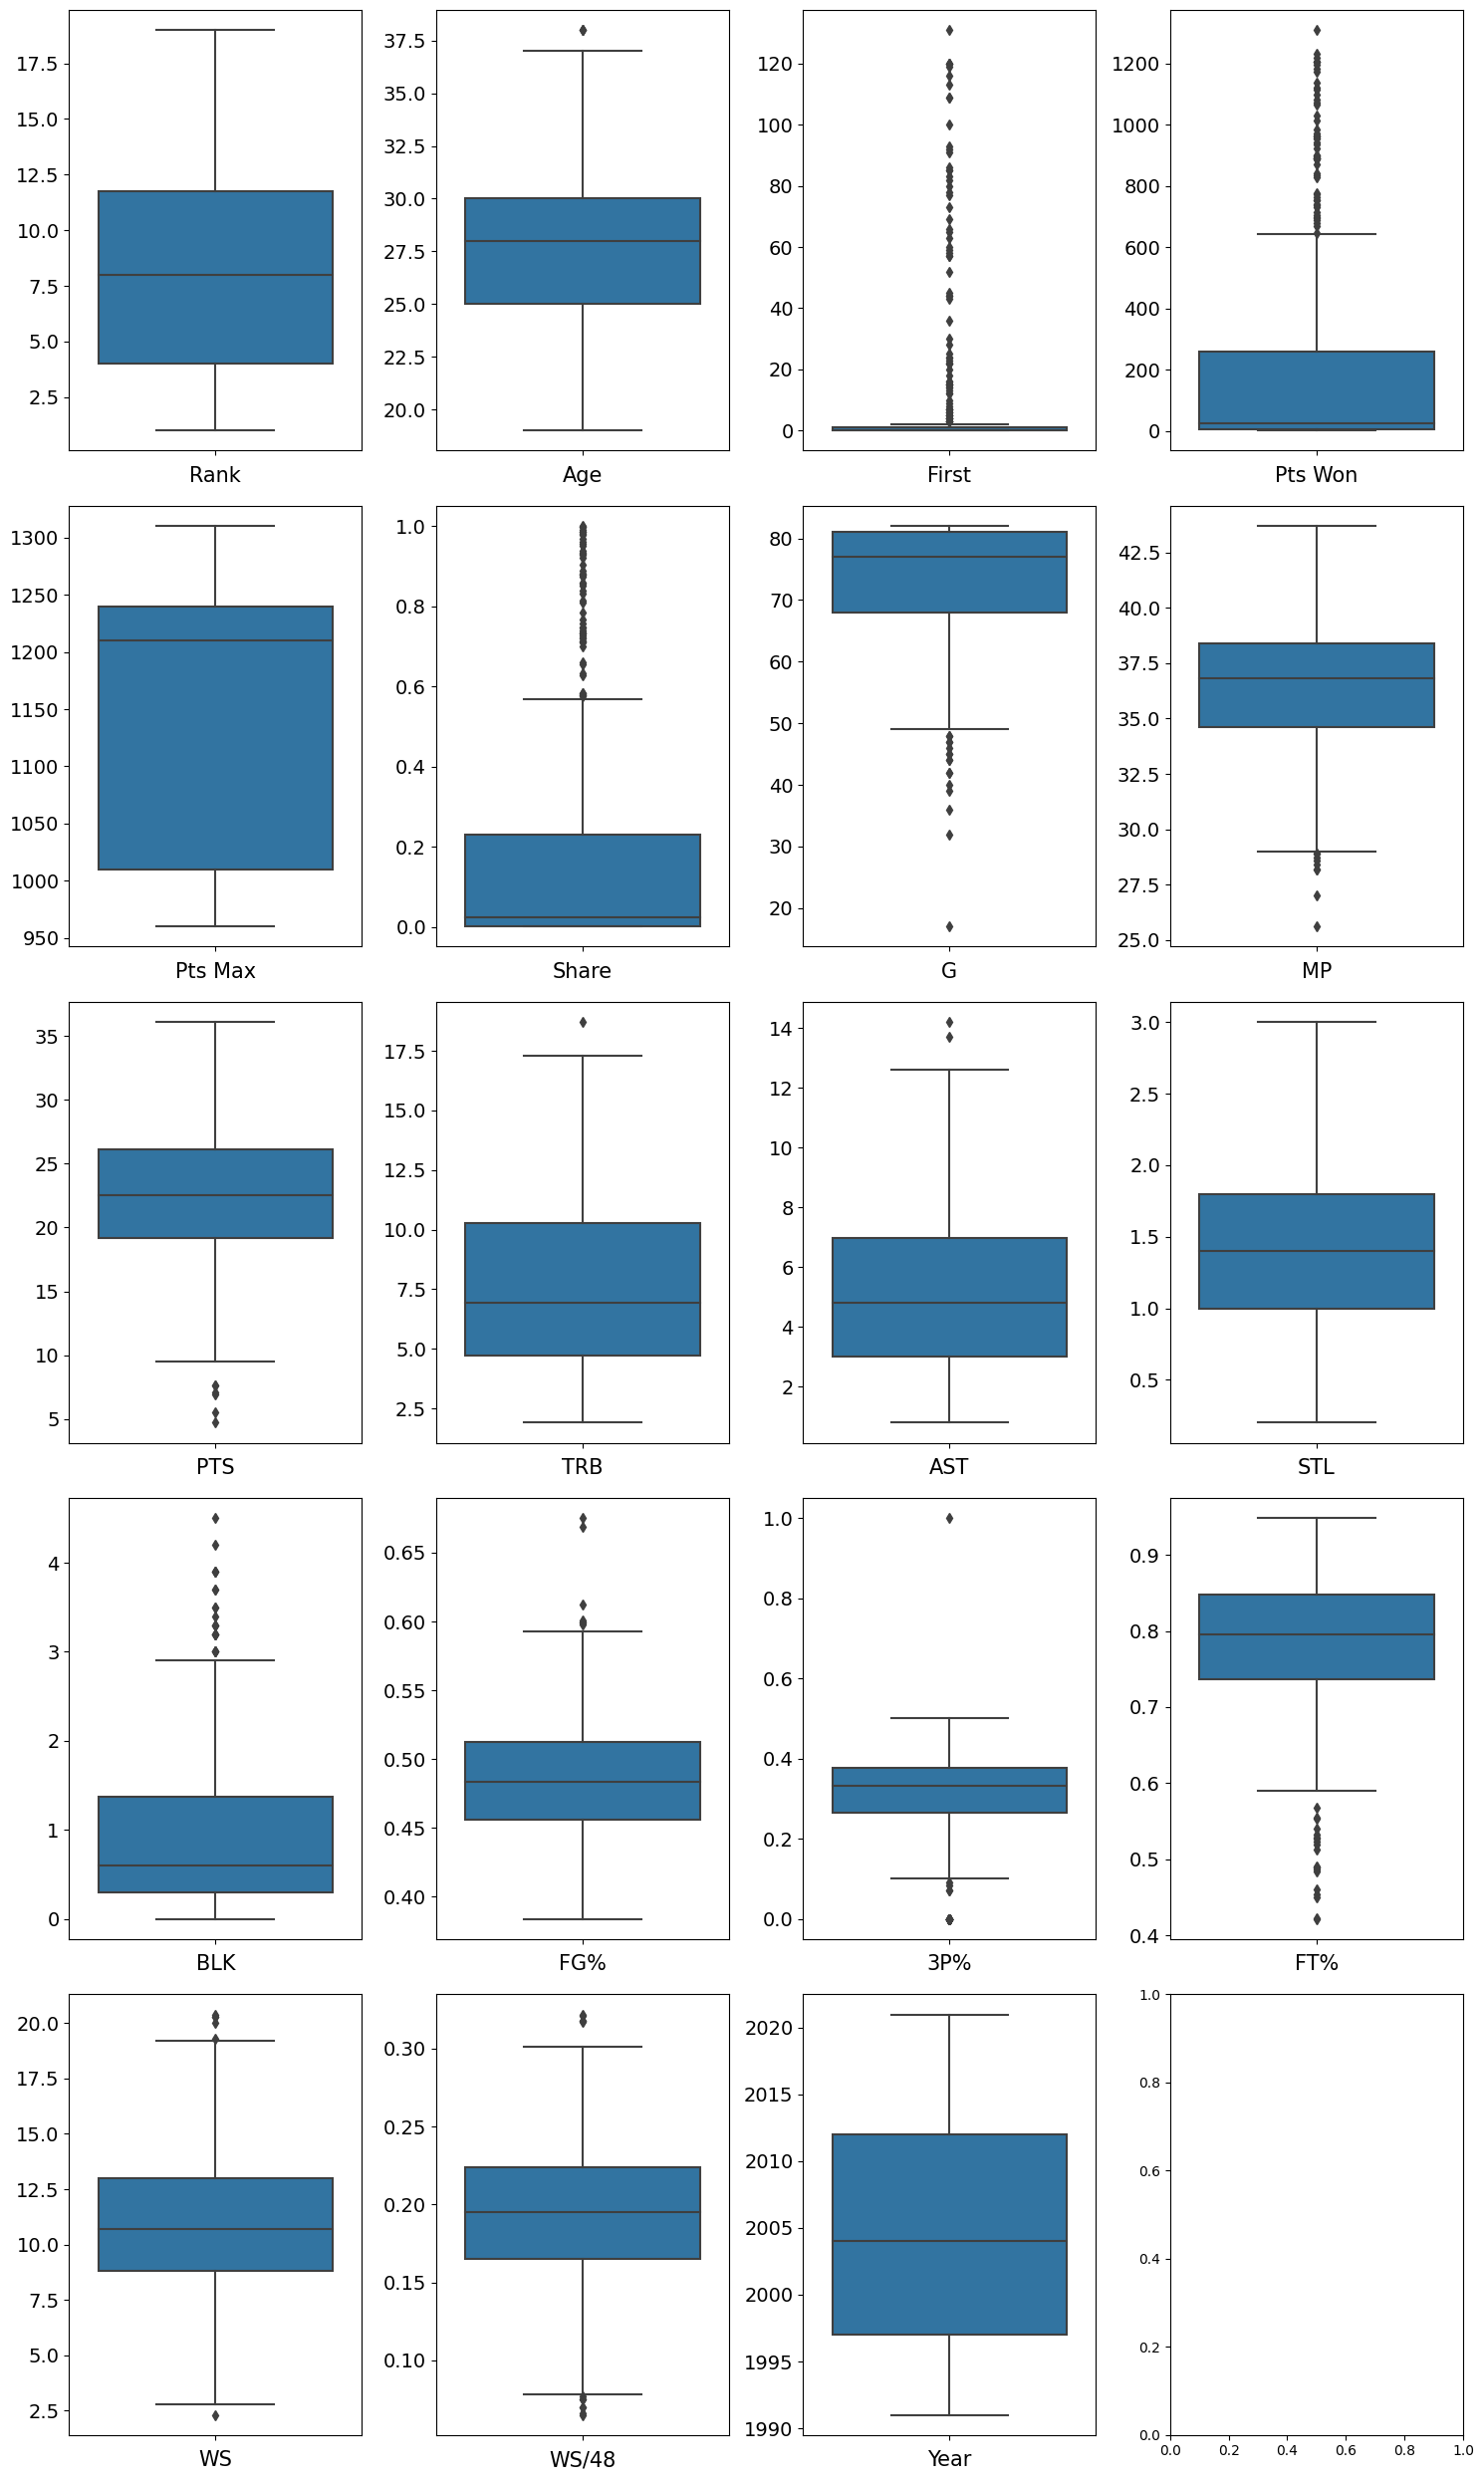

In [ ]:
# Create a Boxplot for the numerical data

# Make the figure for the axes
fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(15, 25))

# Make the axes
index = 0
ax = ax.flatten()
for col, value in num_df.items():
    sns.boxplot(y=col, data=num_df, ax=ax[index])
    ax[index].set(xlabel=col,ylabel='',title='')
    ax[index].xaxis.label.set_size(15)
    ax[index].tick_params(axis="x", labelsize=14)
    ax[index].tick_params(axis="y", labelsize=14)
    index += 1

# Adjust the formatting
plt.tight_layout()

# Show the Scatter Plot
plt.show()

# Task 2: Train Models

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Build 1st Model:
X = df[['First','Rank','Share']]
y = df['Pts Won']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train model1
lr1 = LinearRegression()
model1 = lr1.fit(X_train, y_train)

print("Intercept:", model1.intercept_)

coefficients = dict(zip(X.columns, model1.coef_))
print("Coefficients:", coefficients)

Intercept: 13.883688726820708
Coefficients: {'First': 0.6991853596611768, 'Rank': -1.072786973442149, 'Share': 1091.46648470733}


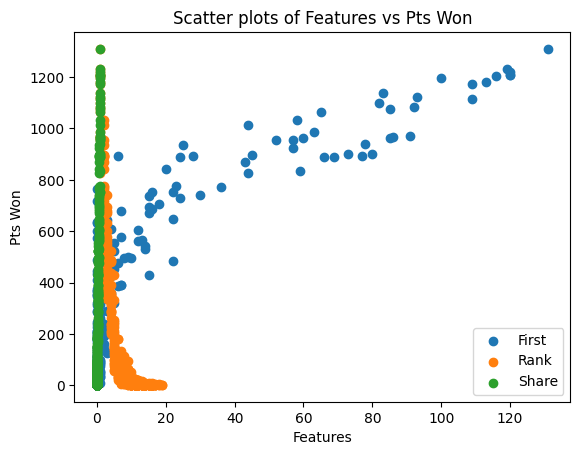

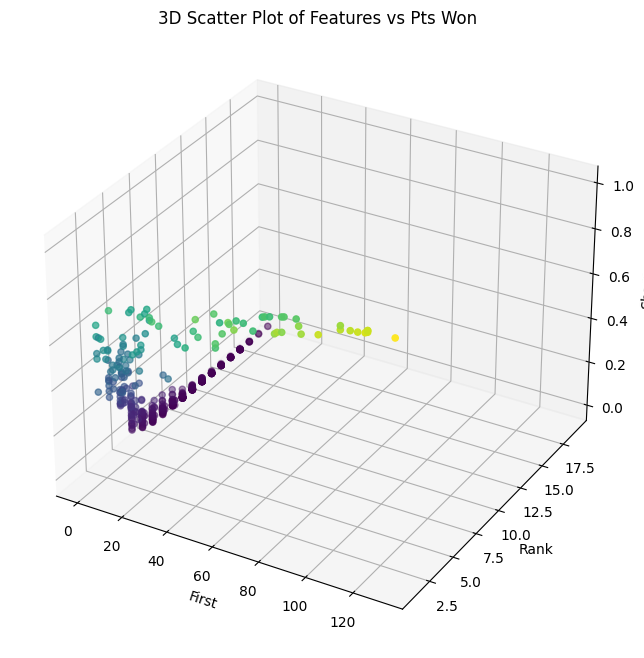

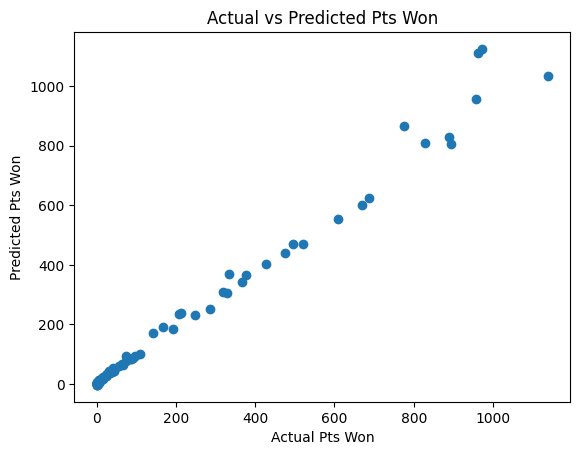

In [ ]:
# Visualize Model 1 Linear Regression

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D Scatter plots
for feature in X.columns:
    plt.scatter(X[feature], y, label=feature)

plt.xlabel('Features')
plt.ylabel('Pts Won')
plt.title('Scatter plots of Features vs Pts Won')
plt.legend()
plt.show()

# 3D Scatter plot for three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['First'], X['Rank'], X['Share'], c=y, marker='o')

ax.set_xlabel('First')
ax.set_ylabel('Rank')
ax.set_zlabel('Share')
ax.set_title('3D Scatter Plot of Features vs Pts Won')

plt.show()

y_pred = model1.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pts Won')
plt.ylabel('Predicted Pts Won')
plt.title('Actual vs Predicted Pts Won')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
regr = DecisionTreeRegressor(max_leaf_nodes=5)
model2 = regr.fit(X, y)

feature_importance = model2.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.01451687 0.         0.98548313]


# Task 3: Test and Evaluate

In [ ]:
# Evaluate model1 using R^2
y1_predicted = model1.predict(X_test)
model1_r2score = r2_score(y_test, y1_predicted)
print("R2 Score for Model 1:",model1_r2score) # R^2 value of model1

# Evaluate model2 using R^2
y2_predicted = model2.predict(X_test)
model2_r2score = r2_score(y_test, y2_predicted)
print("R2 Score for Model 2:",model2_r2score) # R^2 value of model2

R2 Score for Model 1: 0.9864115406936063
R2 Score for Model 2: 0.9634554310580874


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, export_graphviz
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')


# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

<ipython-input-15-9d99b743c148>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


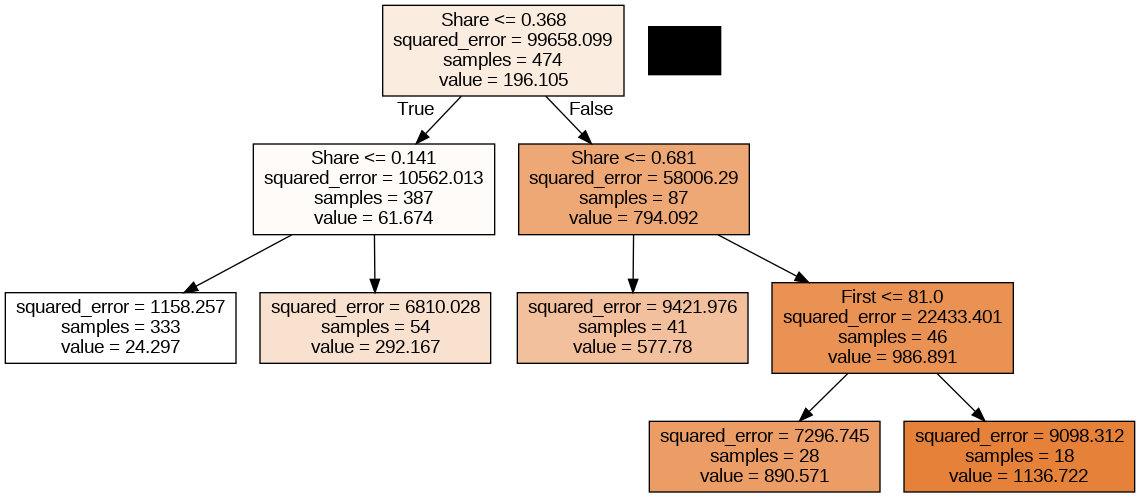

In [ ]:
graph, = print_tree(regr, features=X.columns)
Image(graph.create_png())

In [ ]:
# Create MSE (Mean Squared Error) function
def GetMSE(y, y_hat):
    return ((y-y_hat)**2).mean()

# Evaluate the MSE of model1 and model2
print(GetMSE(y_test, y1_predicted)) # MSE value of model1
print(GetMSE(y_test, y2_predicted)) # MSE value of model2


1069.4923747811467
2876.2744135863472


# Task 4: Make Comparison
Compare the outcomes of both models and engage in a discussion on the strengths and weaknesses of each. Delve into how each model navigated the provided data, and if performance was suboptimal, provide an insightful analysis of the reasons behind it. This discussion should encompass an evaluation of the models' effectiveness, shedding light on their respective advantages and disadvantages. For instance, certain models exhibit limited robustness in handling outliers, while others excel in managing such data anomalies effectively. If, during your comparison of two models, you notice that one performed well while the other did not, it's valuable to investigate this discrepancy with consideration to their inherent capabilities regarding outlier handling, drawing on your prior knowledge in this regard. This exploration can provide insights into the specific aspects of the data where one model may have failed compared to the other.





```
# This is formatted as code
```
The target we chose to observe is "Points Won".
In order to make an accurate model, we chose the independent variables "

